## Objective: Demonstrating outlier detection

### What do you mean by outlier detection?

Outlier detection (also known as anomaly detection) is the process of finding data objects with behaviors that are very different from expectation. Such objects are called outliers or anomalies.

E.g credit card fraud detection

### Challenges of Outlier Detection 

- Modeling normal objects and outliers effectively

- Application-specific outlier detection

- Handling noise in outlier detection

- Understandability

### What is the impact of outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:
- It increases the error variance and reduces the power of statistical tests
- If the outliers are non-randomly distributed, they can decrease normality
- They can bias or influence estimates that may be of substantive interest
- They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.

To understand the impact deeply, let’s take an example to check what happens to a data set with and without outliers in the data set

### What are the types of outliers?

Outlier can be of two types:

- Univariate
- Multivariate.

Univariate outliers can be found when we look at distribution of a single variable. Multi-variate outliers are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions.

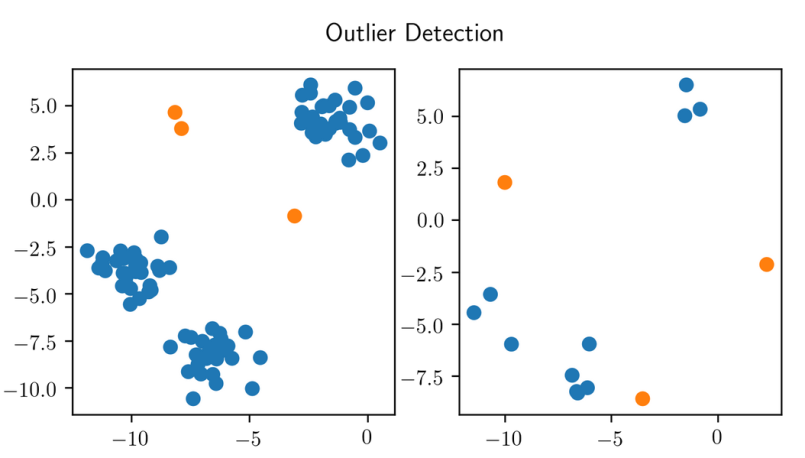

### About the dataset

- age - The age of the patient.
- sex - The gender of the patient. (1 = male, 0 = female).
- cp - Type of chest pain. (1 = typical angina, 2 = atypical angina, 3 = non — anginal pain, 4 = asymptotic).
- trestbps - Resting blood pressure in mmHg.
- chol - Serum Cholestero in mg/dl.
- fbs - Fasting Blood Sugar. (1 = fasting blood sugar is more than 120mg/dl, 0 = otherwise).
- restecg - Resting ElectroCardioGraphic results (0 = normal, 1 = ST-T wave abnormality, 2 = left ventricular hyperthrophy).
- thalach - Max heart rate achieved.
- exang - Exercise induced angina (1 = yes, 0 = no).
- oldpeak - ST depression induced by exercise relative to rest.
- slope - Peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- ca - Number of major vessels (0–3) colored by flourosopy.
- thal - Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).
- num - Diagnosis of heart disease (0 = absence, 1, 2, 3, 4 = present).

### Univariate Outlier Analysis:

#### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style="darkgrid", palette="pastel", color_codes=True)
sns.set_context('talk')

#### Reading the dataset

In [2]:
data = pd.read_csv('heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


#### Data Preprocessing

In [3]:
#Checking for null values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the data frame.

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Let's consider serum cholestoral in mg/dl column i.e. "chol" for our analysis. I'll plot a simple box plot which is the best visualization for detecting outliers**

<AxesSubplot:ylabel='chol'>

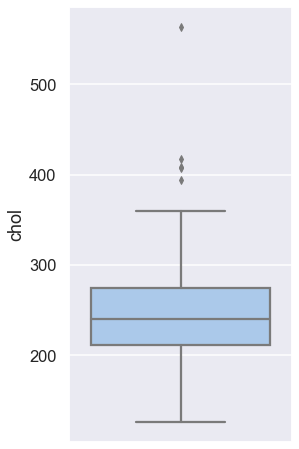

In [5]:
plt.figure(figsize = (4,8))
sns.boxplot(y = data.chol)

From the above box plot, we can observe that there are outliers in it.

### Interquartile Range Method

The concept of the Interquartile Range (IQR) is used to build the boxplot graphs. IQR is a concept in statistics that is used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
In simple words, any dataset or any set of observations is divided into four defined intervals based upon the values of the data and how they compare to the entire dataset. A quartile is what divides the data into three points and four intervals.

In [6]:
def out_iqr(data , column):
    global lower,upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    #Calculate the IQR
    iqr = q75 - q25
    #Calculate the outlier cutoff
    cut_off = iqr * 1.5
    #Calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    #Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [7]:
out_iqr(data,'chol')

The IQR is 63.5
The lower bound value is 115.75
The upper bound value is 369.75
Total number of outliers are 5


As per the IQR method, there are 5 outliers.

#### Visual Representation

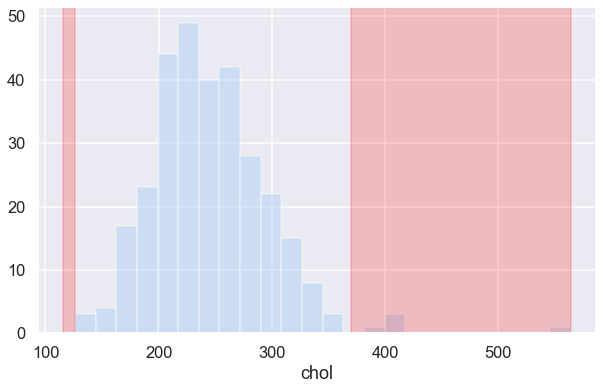

In [8]:
plt.figure(figsize = (10,6))
sns.distplot(data.chol, kde=False)
plt.axvspan(xmin = lower,xmax = data.chol.min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax = data.chol.max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers.

### Standard Deviation Method

Standard deviation is a metric of variance i.e. how much the individual data points are spread out from the mean. In statistics, If a data distribution is approximately normal then about 68% of the data values lie within one standard deviation of the mean and about 95% are within two standard deviations, and about 99.7% lie within three standard deviations

In [9]:
def out_std(data, column):
    global lower,upper
    #Calculate the mean and standard deviation of the data frame
    data_mean, data_std = data[column].mean(), data[column].std()
    # calculate the cutoff value
    cut_off = data_std * 3
    # calculate the lower and upper bound value
    lower, upper = data_mean - cut_off, data_mean + cut_off
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [10]:
out_std(data,'chol')

The lower bound value is 90.77177343885015
The upper bound value is 401.75627936643036
Total number of outliers are 4


As per the SD method, there are 4 outliers.

#### Visual Representation

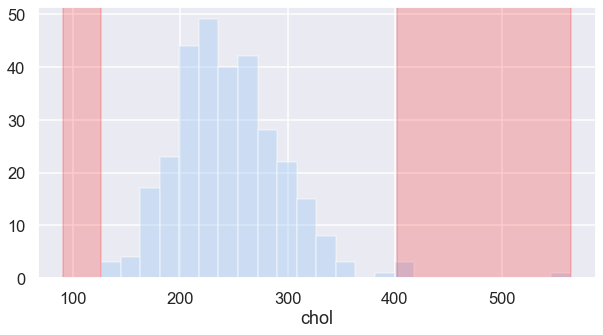

In [11]:
plt.figure(figsize = (10,5))
sns.distplot(data['chol'], kde=False)
plt.axvspan(xmin = lower,xmax= data['chol'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= data['chol'].max(),alpha=0.2, color='red')

Here the red zone represents the outlier zone. The records present in that zone are considered as outliers.

### Z-Score Method

The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.

The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

You must be wondering that, how does this help in identifying the outliers? Well, while calculating the Z-score we re-scale and center the data and look for data points which are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

This technique assumes a Gaussian distribution of the data. The outliers are the data points that are in the tails of the distribution and therefore far from the mean. How far depends on a set threshold zthr for the normalized data points zi calculated with the formula:

**Z_score= (Xi - mean) / standard deviation**

<AxesSubplot:xlabel='chol', ylabel='Density'>

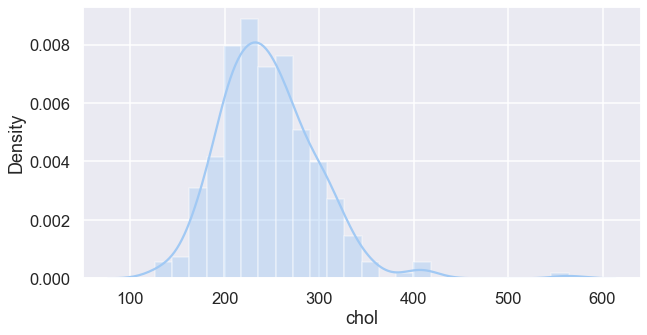

In [12]:
plt.figure(figsize = (10,5))
sns.distplot(data['chol'])

By the looks of it, it is right tailed and it surely has outliers.

In [13]:
def out_zscore(data):
    global outliers,zscore
    outliers = []
    zscore = []
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score= (i - mean)/std 
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return print("Total number of outliers are",len(outliers))

In [14]:
out_zscore(data.chol)

Total number of outliers are 4


#### Visual Representation

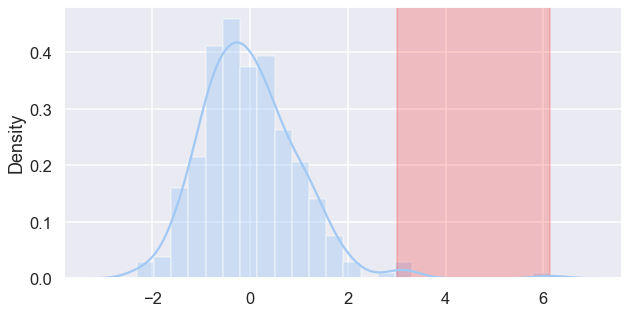

In [15]:
plt.figure(figsize = (10,5))
sns.distplot(zscore)
plt.axvspan(xmin = 3 ,xmax= max(zscore),alpha=0.2, color='red')

Here the red zone represents the outlier zone. The records present in that zone are considered as outliers.

### Isolation Forest

Isolation forest is an algorithm to detect outliers. It partitions the data using a set of trees and provides an anomaly score looking at how isolated the point is in the structure found. The anomaly score is then used to tell apart outliers from normal observations.
An important concept in this method is the isolation number. The isolation number is the number of splits needed to isolate a data point. This number of splits is ascertained by following these steps:
- A point “a” to isolate is selected randomly.
- A random data point “b” is selected that is between the minimum and maximum value and different from “a”.
- If the value of “b” is lower than the value of “a”, the value of “b” becomes the new lower limit.
- If the value of “b” is greater than the value of “a”, the value of “b” becomes the new upper limit.
- This procedure is repeated as long as there are data points other than “a” between the upper and the lower limit.

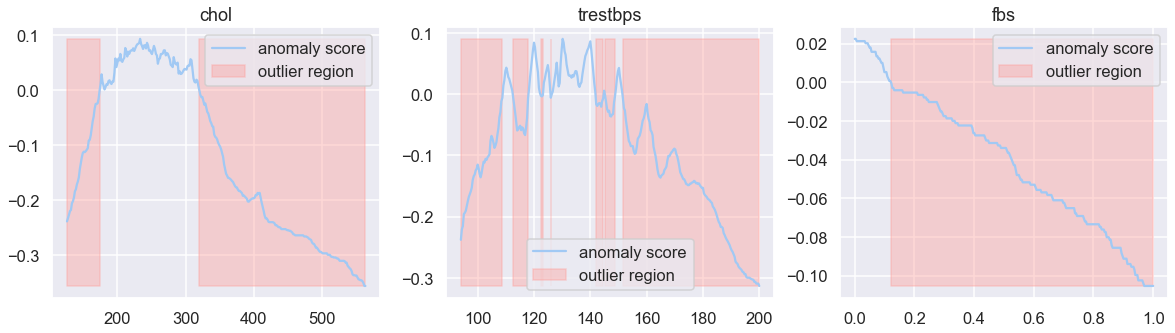

In [16]:
#Import necessary libraries
from sklearn.ensemble import IsolationForest
#The required columns
cols = ['chol','trestbps','fbs']
#Plotting the sub plot
fig, axs = plt.subplots(1, 3, figsize=(20, 5), facecolor='w', edgecolor='k')
axs = axs.ravel()

for i, column in enumerate(cols):
    isolation_forest = IsolationForest(contamination='auto')
    isolation_forest.fit(data[column].values.reshape(-1,1))

    xx = np.linspace(data[column].min(), data[column].max(), len(data)).reshape(-1,1)
    anomaly_score = isolation_forest.decision_function(xx)
    outlier = isolation_forest.predict(xx)
    
    axs[i].plot(xx, anomaly_score, label='anomaly score')
    axs[i].fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                     where=outlier==-1, color='r', 
                     alpha=.4, label='outlier region')
    axs[i].legend()
    axs[i].set_title(column)

In the snippet above, we have trained our IsolationForest using the data generated, computed the anomaly score for each observation, and classified each observation as an outlier or non-outlier. The chart shows the anomaly scores and the regions where the outliers are. As expected, the anomaly score reflects the shape of the underlying distribution and the outlier regions correspond to low probability areas.

### Multivariate Outliers Analysis:

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

This is a clustering algorithm (an alternative to K-Means) that clusters points together and identifies any points not belonging to a cluster as outliers. It’s like K-means, except the number of clusters does not need to be specified in advance.
I will show you an example of using DBScan but before we start, let’s cover some important concepts. DBScan has three important concepts:
- Core Points: In order to understand the concept of the core points, we need to visit some of the hyperparameters used to define DBScan job. First hyperparameter (HP) is min_samples. This is simply the minimum number of core points needed in order to form a cluster. second important HP is 'eps'. 'eps' is the maximum distance between two samples for them to be considered as in the same cluster.
- Border Points are in the same cluster as core points but much further away from the centre of the cluster.
- Everything else is called Noise Points, those are data points that do not belong to any cluster. They can be anomalous or non-anomalous and they need further investigation. Now, let’s see some code.

In [17]:
X = data[['age','chol']].values

db = DBSCAN(eps=3.0, min_samples=10).fit(X)
labels = db.labels_

In [18]:
pd.Series(labels).value_counts()

-1    303
dtype: int64

Here the -1's represent the outliers.
Let's plot to differentiate the outliers. I'll set the blue colour to normal records and red colour to outliers.

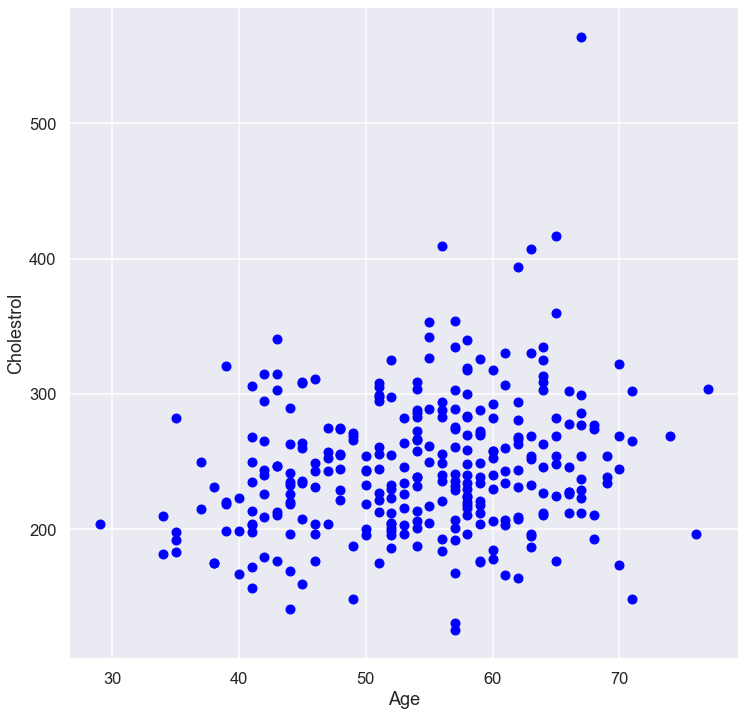

In [19]:
plt.figure(figsize=(12,12))

unique_labels = set(labels)
colors = ['blue', 'red']

for color,label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color=color);
plt.xlabel('Age');
plt.ylabel('Cholestrol');

### Local Outlier Factor Method (LOF):

LOF uses density-based outlier detection to identify local outliers, points that are outliers with respect to their local neighborhood, rather than with respect to the global data distribution. The higher the LOF value for an observation, the more anomalous the observation.
This is useful because not all methods will not identify a point that’s an outlier relative to a nearby cluster of points (a local outlier) if that whole region is not an outlying region in the global space of data points.
A point is labeled as an outlier if the density around that point is significantly different from the density around its neighbors.
In the below feature space, LOF is able to identify P1 and P2 as outliers, which are local outliers to Cluster 2 (in addition to P3).

In [20]:
clf = LocalOutlierFactor(n_neighbors=50, contamination='auto')
X = data[['age','chol']].values
y_pred = clf.fit_predict(X)

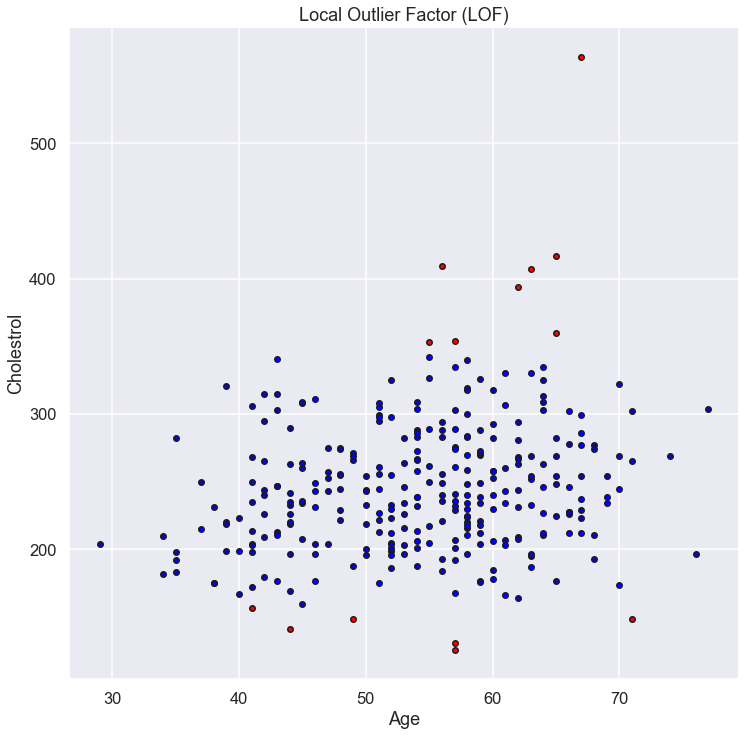

In [21]:
plt.figure(figsize=(12,12))
# plot the level sets of the decision function

in_mask = [True if l == 1 else False for l in y_pred]
out_mask = [True if l == -1 else False for l in y_pred]

plt.title("Local Outlier Factor (LOF)")
# inliers
a = plt.scatter(X[in_mask, 0], X[in_mask, 1], c = 'blue',
                edgecolor = 'k', s = 30)
# outliers
b = plt.scatter(X[out_mask, 0], X[out_mask, 1], c = 'red',
                edgecolor = 'k', s = 30)
plt.axis('tight')
plt.xlabel('Age');
plt.ylabel('Cholestrol');
plt.show()

### Conclusion

While outlier removal forms an essential part of a dataset normalization, it’s important to ensure zero errors in the assumptions that influence outlier removal. Data with even significant number of outliers may not always be bad data and a rigorous investigation of the dataset in itself is often warranted, but overlooked, by data scientists in their processes.